<div style="display: flex; justify-content: space-between; align-items: left; font-size: 20px;">
    <div style="text-align: left;">RMIT University</div>
    <div style="text-align: right;">School of Science, Engineering and Technology (SSET)</div>
    <div style="text-align: right;">COSC2968/COSC3053 - Foundation of AI for STEM</div>
</div>

<div></div>
<div style="text-align:center; font-size: 26px"> Assignment 2 - OPTION A(PROGRAMMING): CLASSICAL AI </div>
<div></div>
<div style="text-align:center; font-size: 26px"> Lecturer: Dr. Tran Quang Nhat and Ms. Le Van Anh
<div></div>
<div style="text-align:center; font-size: 26px"> Student: Le Duc Loc - s4023679
<div></div>
<div style="text-align:center; font-size: 20px"> "I declare that in submitting all work for this assessment I have read, understood, and agree to the content and expectations of the Assessment declaration"

##### Assignment's details:
- Build an AI program to find the best flight paths for delivery drones using A* algorithm
- The city is represented as a 2D grid map in the program 

##### Map representation:
- Design a data structure to present a city map, with the starting point and end point for each location

##### Heuristic Function:
- Select and implement a heuristic function using Python

##### A* Implementation:

##### Evaluation:
- Test your program with at least 2 city maps and analyze its efficiency

### I. A* Algorithm analysis:
A* search algorithm is an algorithm that finds the best solution/path from one point to another. By utilizing the the priority queue instead of the FIFO or LIFO queue, this algorithm is able to find the best possible path on a map using this search method. Moreover, this search algorithm finds the path by calculating the total path cost, represented by the following equation:

<div style="text-align: center;"> f(n) = g(n) + h(n) </div>

The g(n) stands for the total cost from the starting position to the *current position* of the object, h(n) stands for the heuristic function, calculating the straight-line cost from the *current position* to the goal. Finally, f(n) is the total cost for the object to move from A to B, in this case, the lower to cost, the better.

Because of that, we are to decide the heuristic equation we will use to save cost while finding the best possible path for our object (a drone) to move through a 2D grid without hitting any obstacles or running out of the map. There are 4 most used equations for the heuristic function:

1. Manhattan Distance: 
    - Used when movement is allowed only in four directions (up, down, left, right) and there is no diagonal movement. The distance is calculated as the sum of the absolute differences in the x and y coordinates.
        - h(x) = ∣xgoal − xcurrent∣ + ∣ygoal − ycurrent∣

2. Euclidean Distance: 
    - Used when movement can be in any direction, including diagonally, and the cost of diagonal movement is the same as horizontal or vertical movement.
        - h(x) = (xgoal − xcurrent)^2 + (ygoal − ycurrent)^2

3. Chebyshev Distance:
    - Used when diagonal movement is allowed, and the cost of diagonal movement is the same as the cost of horizontal or vertical movement. It is particularly effective in environments where the movement cost is uniform, regardless of direction.
        - h(x) = max⁡(∣xgoal − xcurrent∣, ∣ygoal − ycurrent∣)

4. Octile Distance: 
    - A variant of Euclidean distance that's used when diagonal movement is allowed but has a different cost (usually higher) compared to horizontal and vertical movements.
        - h(x) = max⁡(∣xgoal − xcurrent∣, ∣ygoal − ycurrent∣) +(2−1) × min⁡(∣xgoal − xcurrent∣, ∣ygoal − ycurrent∣)

##### Deciding the heuristic equation:
The heuristic equation used is an important factor we need to consider when deciding the best possible route/path to optimize the drone's movement from A to B. To find the best heuristic equation out of the 4 equations I have mentioned above, we need to consider some of the following factors:
- The equation allows for diagonal movement to allow the drone to find the best path and has a uniform-cost
- It should allow the drone to move in 8 possible directions.
- Allow accurate estimation when calculating the number of steps the drone needs to take to get from one point to another

From there, after analyzing each of the equations above, I have concluded that the **Chebyshev Distance** equation meets all of the requirements above. Here are some comparisons between the Chebyshev Distance equation and the other 3:

1. Manhattan Distance:
    - The Manhattan Distance only allows straight line movement (horizontal and vertical movement), whereas the Chebyshev allows for diagonal movement in addition to straight line movements. 

2. Euclidean Distance:
    - Although Euclidean allows for diagonal movement, and cost is uniform, which can reduce path cost and allow the program to find the optimal path.
    - It allows for movement in **all direction**, which is more suitable on a 2D plane where the object can move freely, while the program is working with a 2D grid.

3. Octile Distance:
    - It is the same as Euclidean Distance but the diagonal movements have a higher cost than straight-line movements, which reduces the number of option to optimize path cost.


### II. Code analysis

We start by asking the user's for inputs, asking for the start position as well as how many end points they want to have. This allows my program to go through a for loop with the number of end points entered into the program:

*Note: I also added 2 variables as the global variables to gain access to it anywhere in the program, instead of passing it as parameters:*
*Those two variables are:*
1. *The map options:*
    - *I've designed 3 different maps, with 3 different names of Hanoi, Sai Gon, and Da Lat in a ***map_options*** dictionary for easy access*

In [11]:
# Create a Dictionary of maps, in order for the user to get easy access to each map via integers (Global variable - for access)
map_options = {
    1:  {
        'name' : 'Hanoi',
        'grid' : [
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
    },
    
    2:  {
        'name' : 'Sai Gon',
        'grid' : [
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]
    },
    
    3:  {
        'name' : 'Da Lat',
        'grid' : [
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]]
    }
} 

2. *The replacement characters:*
    - *This is for formatting the map options only and purely used for an easier visualization of the map*

In [12]:
# replacements instead of the number 0 and 1, I used symbols instead
replacements = {0: '.', 1: '|'} 

***One more thing to note is that the path_visualize() function can only be run if you've download the matplotlib import into your VScode. Here is a quick instruction to how to download it:***

*In your terminal window, type:*
1. python -m pip install -U pip
2. python -m pip install -U matplotlib
> Then the program is good to go:

In [13]:
import matplotlib.pyplot as plt
import numpy as np

##### 1. A Node class:
- This class acts as a tracker and save all the nodes/coordinates that the drone has gone through. Moreover, the parent variable saves the previous node of the current node that is currently being analyze.

- The g, h and f variable stands for the evaluation function, calculating the path cost of the whole journey. The calculation processes by f(n) = h(n) + g(n) where f(n) is the total path cost, g(n) is the starting position to the current position of the node and lastly h(n) is the heuristic function, which represents the distance from the current position of the node to the end node in a straight line.

In [14]:
class Node():
    def __init__(self, parent=None, position=None): # A constructor that gets the 3 variables of a node, (self - the node itself), (parent - the previous node that it derives from), (position - the coordinates of the node)
        self.parent = parent # The previous node of the current node
        self.position = position # Saving the two x and y coordinates of the current node

        self.g = 0 # PATH-COST => From the starting position to the current position of the drone
        self.h = 0 # A visualization of a straight line to the goal, which analyzes the cost of moving from the current position to goal => for this case less is better
        self.f = 0 # evaluation function f(n) = g(n) + h(n)

    def __eq__(self, other):
        return self.position == other.position

##### 2. A* algorithm function:
- The main function of this program is that runs after the user inputs the start and end position of their drone. The A* algorithm runs by analyzing each node's children (frontier) and finding the best route using the function f(n) = g(n) + h(n) as I have mentioned above.

- This is how the main function works, in these steps:

    - Starting the function:
        1. The function define the step cost = 1, of moving from one point to another.
        2. Create a start and end node object using the parameters that have been passed in the function.
        3. Create an `open_list` of new frontier nodes and `closed_list` for explored nodes.
        ```python
            STEP_COST = 1 # Step cost - A representation for the cost of moving from one point to another

            # Create start and end node. This is used to compare the node for the ending.
            start_node = Node(None, start)
            start_node.g = start_node.h = start_node.f = 0
            end_node = Node(None, end)
            end_node.g = end_node.h = end_node.f = 0

            # Initialize both open and closed list
            open_list = []    # frontier
            closed_list = []  # explored
            open_list_states = []    # saving the position of the frontier nodes (x, y)
            closed_list_states = []  # saving the position of the already explored nodes (x, y)

            # Add the start node
            open_list.append(start_node) # Getting the start node to the open list, before exploring
            open_list_states.append(start_node.position) # Also adding the position fo the open node
        ```

    - Updating the current node:
        1. Using a loop, determine the current node by finding the lowest f(n) value.
        2. Setting the current node coordinates, and index.

        ```python
            # Loop until you find the end
            while len(open_list) > 0:

                # Get the current node by searching for f(n) value
                current_node = open_list[0]
                current_index = 0
                for index, item in enumerate(open_list):
                    #if item.g < current_node.g: # qNote: Uniform-cost search
                    #if item.h < current_node.h: # qNote: Best-first search
                    if item.f < current_node.f: # qNote: a A-star search
                        current_node = item
                        current_index = index
        ```

    - Updating the open and closed list:
        ```python 
            # Pop current off open list, add to closed list
            open_list.pop(current_index)
            open_list_states.pop(current_index) # Appending the explored nodes    
            closed_list.append(current_node)
            closed_list_states.append(current_node.position) # Append the explored nodes/nodes that are not chosen
        ```

    - Check if we have reach the goal, using a while loop:
        1. Create a new list to save the previous nodes we've explored.
        2. Setting the `current` variable as their parent node to save until we reached the start position.

        ```python
            # Check if found the goal
            if current_node == end_node:
                path = [] # A new list to save the coordinates of the nodes that we've explored
                current = current_node
                while current is not None:  # Loop until we reach the start node with no parent
                    path.append(current.position)
                    current = current.parent 
                return path[::-1] # Return reversed path
        ```

    - Generating children nodes (frontier) of the current node:
        1. `children = []` list to save new nodes.
        2. Using a for loop to loop through the possible movements of the drone (8 directions) => checking to see if the move either doesn't hit the obstacle and is not outside of the map:

        ```python
            children = []
            for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

                # Get node position
                node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1]) # Adding the current node to the movement nodes in the new position list

                # Make sure within the map, not outside of it
                if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                    continue 

                # Make sure that doesn't hit the obstacle
                if maze[node_position[0]][node_position[1]] != 0:
                    continue
        ```
        
        3. Save the new possible nodes into the children list:

        ```python
            # Create new node and adding the parent node as the current node, and the new node's position
            new_node = Node(current_node, node_position)

            # Appending the new node to the list of children node
            children.append(new_node)
        ```

    - Saving the new information of the children node:
        1. Looping through the children list to calculate f(n) values, and see if it is in the `close_list_states` or the `open_list_states`

        ```python
            # Loop through children
            for child in children:
                if child.position in closed_list_states:
                    continue 
                if child.position in open_list_states:
                    continue 

                # Create the f, g, and h values
                child.g = current_node.g + STEP_COST # Adding the uniform step cost of 1 to the current node
                child.h = max(abs(child.position[0] - end_node.position[0]), abs(child.position[1] - end_node.position[1])) # The Cherbyshev Distance caclculation method to the heuristic value
                child.f = child.g + child.h # Calculating the total cost of the move, and saving it to the node

                # Update f(n)
                for index, item in enumerate(open_list): # Updating the open list for the number of nodes that have yet to explore
                    if child.position == item.position and child.f < item.f:
                        open_list.pop(index) # Remove the node to replace with child later   
                            
                # Add the child to the open list
                open_list.append(child)
                open_list_states.append(child.position); 
        ```

In [15]:
def astar(maze, start, end):
    STEP_COST = 1 # Step cost - A representation for the cost of moving from one point to another

    # Create start and end node. This is used to compare the node for the ending.
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []    # frontier
    closed_list = []  # explored
    open_list_states = []    # saving the position of the frontier nodes (x, y)
    closed_list_states = []  # saving the position of the already explored nodes (x, y)

    # Add the start node
    open_list.append(start_node) # Getting the start node to the open list, before exploring
    open_list_states.append(start_node.position) # Also adding the position fo the open node

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node by searching for f(n) value
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            #if item.g < current_node.g: # qNote: Uniform-cost search
            #if item.h < current_node.h: # qNote: Best-first search
            if item.f < current_node.f: # qNote: a A-star search
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        open_list_states.pop(current_index) # Appending the explored nodes    
        closed_list.append(current_node)
        closed_list_states.append(current_node.position) # Append the explored nodes/nodes that are not chosen

        # Check if found the goal
        if current_node == end_node:
            path = [] # A new list to save the coordinates of the nodes that we've explored
            current = current_node
            while current is not None:  # Loop until we reach the start node with no parent
                path.append(current.position)
                current = current.parent 
            return path[::-1] # Return reversed path

        # Expansion: Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1]) # Adding the current node to the movement nodes in the new position list

            # Make sure within the map, not outside of it
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue 

            # Make sure that doesn't hit the obstacle
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node and adding the parent node as the current node, and the new node's position
            new_node = Node(current_node, node_position)

            # Appending the new node to the list of children node
            children.append(new_node)

        # Loop through children
        for child in children:
            if child.position in closed_list_states:
                continue 
            if child.position in open_list_states:
                continue 

            # Create the f, g, and h values
            child.g = current_node.g + STEP_COST # Adding the uniform step cost of 1 to the current node
            child.h = max(abs(child.position[0] - end_node.position[0]), abs(child.position[1] - end_node.position[1])) # The Cherbyshev Distance caclculation method to the heuristic value
            child.f = child.g + child.h # Calculating the total cost of the move, and saving it to the node

            # Update f(n)
            for index, item in enumerate(open_list): # Updating the open list for the number of nodes that have yet to explore
                if child.position == item.position and child.f < item.f:
                    open_list.pop(index) # Remove the node to replace with child later   
                        
            # Add the child to the open list
            open_list.append(child)
            open_list_states.append(child.position); 

##### 3. Displaying map function:
- This function displays a text-based map using the integer parameter id passed into the function to print the map based on their dictionary ID, and also printing the map's name and formatting the grid instead of 0s and 1s, it displays the replacement values **(0 = '.', 1 = '|')** :

- Code:
    ```python
    for row in map_grid:
    print(' '.join([replacements.get(value, str(value)) for value in row]))
    ```

- If the map is not found then it will print and error-handling message:
    ```python 
    print(f"Map ID {id} not found.")
     ```

In [16]:
def display_maps(id):
    # Retrieve the map data from the dictionary
    if id in map_options:
        map_grid = map_options[id]['grid']
        map_name = map_options[id]['name']
        
        # Print the map name
        print(f"{map_name}:")

        # Iterate over each row in the grid and print it
        for row in map_grid:
            print(' '.join([replacements.get(value, str(value)) for value in row]))
    else:
        print(f"Map ID {id} not found.")

##### 4. Input validity checking:
- This function checks the validity of each user's input. The two parameters passed into the function are the position (x, y) coordinates that the user entered in the terminal, this checks to see the input is 1. not an obstacle, and 2. inside of the map range.

    1. Not a passable block:
        ```python
        if map_grid[x][y] != 0: # See if it is an obstacle
            return False
        ```
    2. Inside of the map range:
        ```python
        elif x < 0 or y < 0 or x > 9 or y > 9: # See if it is outside the map
            return False
        ```
    3. Else if it is the correct input:
        ```python
        else: # Else it is a correct input
            return True
        ```

In [17]:
def checkValid(position, map_grid): # An error handling function to check for the position of x and y if it is an obstacle and the position is outside of the map
    x, y = position
    
    if map_grid[x][y] != 0: # See if it is an obstacle
        return False
    elif x < 0 or y < 0 or x > 9 or y > 9: # See if it is outside the map
        return False
    else: # Else it is a correct input
        return True

##### 5. Displaying a text-based path in the command window:
- After every analysis of the user-input start position and end position, this function will be called. It displays the path that has been taken by the drone, and replacing every cell/block inside of the path coordinates with 'O' - start position, 'X' - end position, and 'P' for general path.

- To swap the following symbols into the variable grid_with_path, I utilized a for loop and looping through x and y (the coordinates variable of the grid) of the path, and swap each cell with the symbols I've mentioned above. Afterwards, I display the map grid with path in the terminal with the use of a for loop again:
    ```python
    for row in grid_with_path:
        print(' '.join([replacements.get(value, str(value)) for value in row]))
    ```

In [18]:
def path_display(path, start, end, map_grid):
    # Create a copy of the grid to avoid modifying the original grid:
    grid_with_path = [row[:] for row in map_grid] # Copying the original map grid into a new 2D list using for loop to copy each row from the map grid
    
    # Setting the start and end point as separate symbol
    start_symbol = 'O'
    end_symbol = 'X'    
    
    # Mark the path using the symbol changing method:
    path_symbol = 'P'
    for x, y in path:
        if x == start[0] and y == start[1]:
            grid_with_path[x][y] = start_symbol
            
        elif x == end[0] and y == end[1]:
            grid_with_path[x][y] = end_symbol
            
        else:
            grid_with_path[x][y] = path_symbol
    
    for row in grid_with_path:
        print(' '.join([replacements.get(value, str(value)) for value in row]))

##### 6. Displaying a visualization of the map grid and the drone's path:
- This function utilizes the import of matplotlib and numpy into the code:
    ```python
    import matplotlib.pyplot as plt
    import numpy as np
    ```

- The function displays a visualization of the drone's displacement when moving through the map, while also highlighting the path, start point and end point of the drone inside of the figure. 

*Note: Green dot stands for the starting position of the drone, and red dot stands for its' destination*

In [19]:
def path_visualize(path, selected_map, start_position, end_position):
    # Saving the grid and name of a map to separate variables
    map_grid = np.array(selected_map['grid'])
    map_name = selected_map['name']

    # Create a plot figure for the map:
    plt.figure(figsize=(10,10)) # Adding the figure size to fit the coordinates of the map, path, obstacles, etc.
    plt.imshow(map_grid, cmap = 'Grays', origin = 'upper') # Create and format a map figure
    plt.title(f"Path Visualization on the {map_name} Grid", fontsize=16) # Map title
    plt.grid(False) # Turn off the grid and axis
    plt.axis('on')

    # Show the path on the map
    x_path = [p[1] for p in path] # Plot the x coordinates in the path list
    y_path = [p[0] for p in path] # Plot the y coordinates in the path list
    plt.plot(x_path, y_path) # plotting each coordinates and creating a line, highlighting the drone's path

    # Highlight the start and end positions
    plt.scatter(start_position[0], start_position[1], color='green', s=200, label='Start')  # Start position (green)
    plt.scatter(end_position[1], end_position[0], color='red', s=200, label='End')          # End position (red)

    # Show the graph
    plt.show()

##### 7. Main function:
- Lastly, for the main function, its' usage is for displaying the welcoming message that contains the key for our 2D grid map, accepting user's input (ranges from choosing from one of the three maps, number of destinations for the drone, choosing start/end points, etc.) and calling functions.

- The main function works in the following order:
    1. Welcome message and displaying the map options for the user to see
    2. Accepting input for the choosen map (with error handling) and the number of end points:
    
        ```python
        maze_id = int(input("\nSelect the maze you want to try (from 1 - 3): ")) # Get input from the user's desired map selection
        while maze_id not in map_options: # Error handling any miss input
            print("Invalid map option, please select again!")
            maze_id = int(input("\nSelect the maze you want to try: "))
            
        no_end_points = int(input("\nHow many end points do you want? "))
        ``` 

    3. Ask for input of the starting position (with error handling using the checkValid(positon_check, map_grid) function above):

        ```python
            # Using the split function, enter the start and end point in x y coordinates:
        start_x, start_y = map(int, input("\nSelect your start point for your drone (x, y): ").split())
        position_check = (start_x, start_y)
        
        if checkValid(position_check, map_grid) == False:
            while checkValid(position_check, map_grid) == False:
                start_x, start_y = map(int, input(f"\nPlease re-enter your start point as it is either out of the map or hit an obstacle: ").split())
                position_check = (start_x, start_y)
                checkValid(position_check, map_grid)
        ```

    4. Use a for loop, loop as many times as the number of end points, and repeating the astar function

    5. Display a 2D version of the grid map with the drone's path, and a graph-version of the drone's path

    6. Display the "Evaluation Report" to show the path cost from point A to B, and the coordinates of each node that the drone took.

    


****WELCOME THE THE A* MAZE ALGORITHM TEST!!!**** 
This A* algorithm program searches for the best path in a map! 
Keys:
    '.' = Passable spots
    '|' = Obstacle - You can imagine a wall, unpassable building, etc.
    'P' = Result path - path that the algorithm came up with
    'O' = Starting position of the drone
    'X' = Ending position of the drone
    
Here are some of the maps that you can try
Choose your map in the following options: 

Hanoi:
. . . . . . . . . .
. . | . | . . . . .
. . . . | . | . . .
. | . . | . | . . .
. . . . | | . . . .
. . | . . . . . . .
. . | . | . | . . .
. . | . | | . . . .
. . . | | . | . . .
. . . . . . . | . .
Sai Gon:
. . . . . . . . . .
. . . . . | | | | .
. | . . . | | | | .
. | . . . | . . . .
. | | | | | . . . .
. . | | . . . . . .
. . . | . . . . . .
. . | | . . | . . .
. . . | . . | . . .
. . . . . . | . . .
Da Lat:
. | . . . . . . . .
. | . . . . . . . .
. | . . . . . . . .
. . | . . . . . . .
. . . | . . . . . .
. . . | . . . . . .
. . .

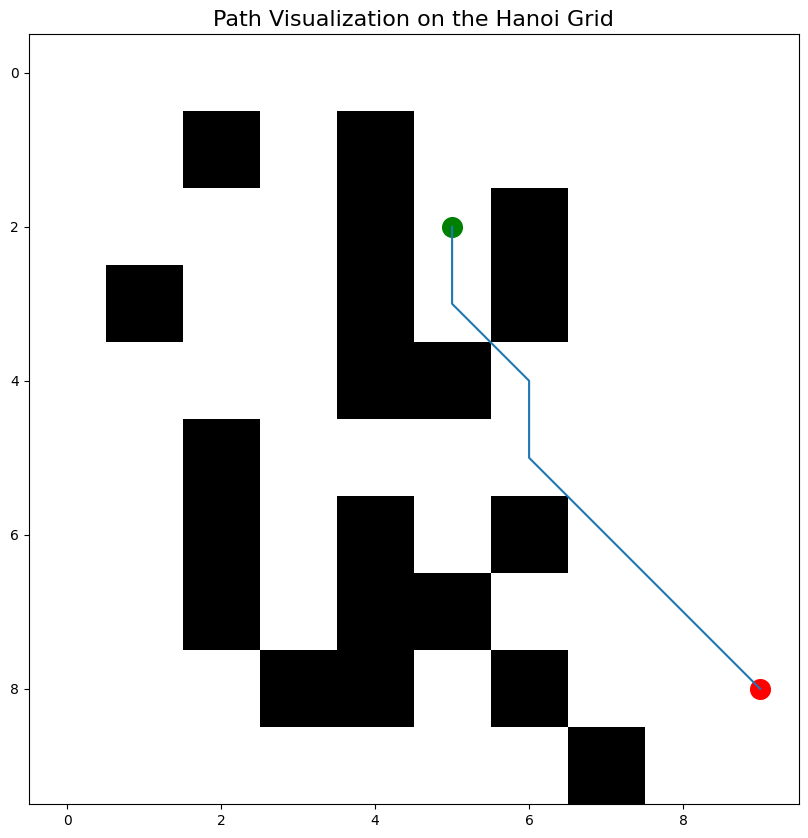


****EVALUATION REPORT****
- Map:                Hanoi, ID: 1
- Path cost:          6
- Starting position:  (2, 5)
- End position:       (8, 9)
- Path:               [(2, 5), (3, 5), (4, 6), (5, 6), (6, 7), (7, 8), (8, 9)]
. . . . . . . . . .
. . | . | . . . . .
. . . . | . | . . .
. | . . | . | . . .
. . . . | | . . . .
. . | . . . . . . .
. . | . | . | X . .
. . | . | | . . P .
. . . | | . | . . O
. . . . . . . | . .
Please close the figure to continue the program!



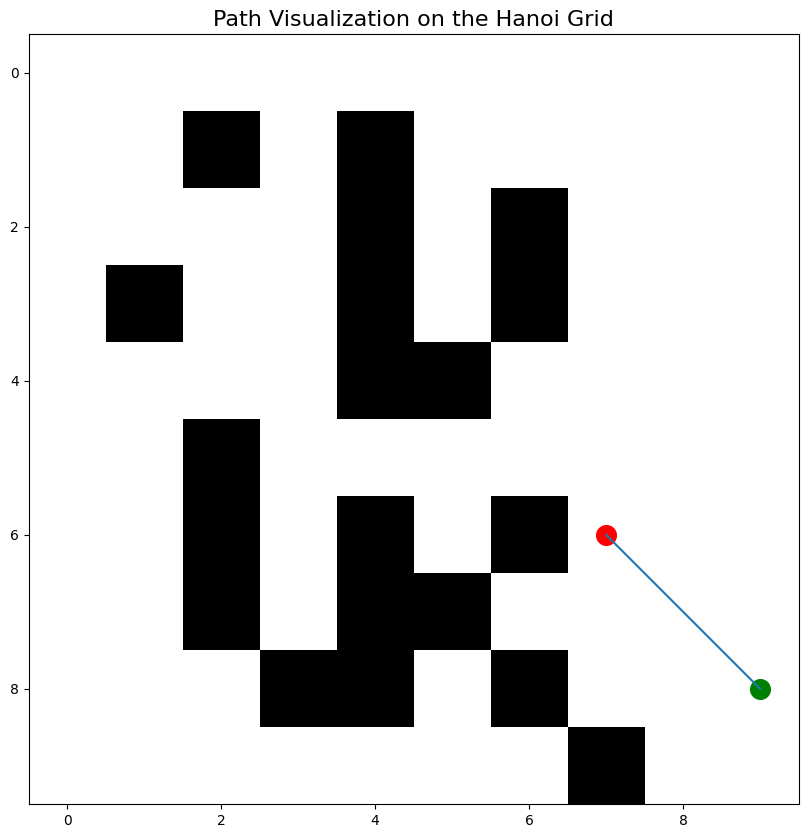


****EVALUATION REPORT****
- Map:                Hanoi, ID: 1
- Path cost:          2
- Starting position:  (8, 9)
- End position:       (6, 7)
- Path:               [(8, 9), (7, 8), (6, 7)]

****TOTAL EVALUATION REPORT****
- Map:                Hanoi, ID: 1
- Total Path cost:    8
- No. end points:     2


In [20]:
def main():
    # A welcoming message for the user and print out the mazes name and their grid for user to see
    print("""\n****WELCOME THE THE A* MAZE ALGORITHM TEST!!!**** \nThis A* algorithm program searches for the best path in a map! \nKeys:
    '.' = Passable spots
    '|' = Obstacle - You can imagine a wall, unpassable building, etc.
    'P' = Result path - path that the algorithm came up with
    'O' = Starting position of the drone
    'X' = Ending position of the drone
    """)            
    print("Here are some of the maps that you can try")   
    
    # Display the map options:
    print("Choose your map in the following options: \n")
    for id in range(1, 4):
        display_maps(id)
    
    maze_id = int(input("\nSelect the maze you want to try (from 1 - 3): ")) # Get input from the user's desired map selection
    while maze_id not in map_options: # Error handling any miss input
        print("Invalid map option, please select again!")
        maze_id = int(input("\nSelect the maze you want to try: "))
        
    no_end_points = int(input("\nHow many end points do you want? "))
        
    # Saving map option:
    selected_map = map_options[maze_id]   
    map_name = map_options[maze_id]['name']
    map_grid = map_options[maze_id]['grid']

    # Using the split function, enter the start and end point in x y coordinates:
    start_x, start_y = map(int, input("\nSelect your start point for your drone (x, y): ").split())
    position_check = (start_x, start_y)
    
    if checkValid(position_check, map_grid) == False:
        while checkValid(position_check, map_grid) == False:
            start_x, start_y = map(int, input(f"\nPlease re-enter your start point as it is either out of the map or hit an obstacle: ").split())
            position_check = (start_x, start_y)
            checkValid(position_check, map_grid)
    
    end_points_list = [] # A list of end points for access, for any drones that have multiple end points
    total_path_cost = 0 # A tracker for the total path cost
    
    for i in range(0, no_end_points):
        if i == 0:
            # The first position will always be the user input start position
            start_position = (start_x, start_y) 
        
        # Asking for the user's end point:
        end_x, end_y = map(int, input(f"\nSelect your end point {i + 1} for your drone (x, y): ").split())
        position_check = (end_x, end_y)
        if checkValid(position_check, map_grid) == False:
            while checkValid(position_check, map_grid) == False:
                end_x, end_y = map(int, input(f"\nPlease re-enter your end point {i + 1} as it is either out of the map or hit an obstacle: ").split())
                position_check = (end_x, end_y)
                checkValid(position_check, map_grid)
        
        # # Saving the two points in a tuple for any path related functions
        # end_points_list[i] = (end_x, end_y)
        end_points_list.append((end_x, end_y))
        
        path = astar(map_grid, start_position, end_points_list[i]) # Start the function by passing the map_grid, and start to end point
        path_display(path, start_position, end_points_list[i], map_grid)
        
        if start_position[0] == 0 or start_position[1] == 0: # If it is 0, 0 for the start position, we can keep the coordinates passing in the function the same
            print("Please close the figure to continue the program!\n") # Instructional message
            path_visualize(path, selected_map, start_position, end_points_list[i])
        else:
            if start_position[0] > 0 or start_position[1] > 0: # A change in start point that leads to a change in the parameter sent to the visualization function
                print("Please close the figure to continue the program!\n")
                path_visualize(path, selected_map, (start_position[1], start_position[0]), end_points_list[i])
                # As coordinates in python works as (y, x), we'll have to swap to position of the user's input for it to work properly
            
        total_path_cost += len(path)-1 # Adding the total path cost 
        
        if path == None: # Error handling the user's input for the obstacle
            print("Error, the position you picked is an obstacle!\n")
        else:
            # Print the Evaluation report:
            print("\n****EVALUATION REPORT****")
            print(f"- Map:                {map_name}, ID: {maze_id}")
            print(f"- Path cost:          {len(path)-1}")
            print(f"- Starting position:  {start_position}")
            print(f"- End position:       {end_points_list[i]}")
            print(f"- Path:               {path}") # Print the path
        
        # Update the new start position and check variable to run the error handling for end inputs:
        start_position = end_points_list[i]
        
    if no_end_points > 1:
        print("\n****TOTAL EVALUATION REPORT****")
        print(f"- Map:                {map_name}, ID: {maze_id}")
        print(f"- Total Path cost:    {total_path_cost}")
        print(f"- No. end points:     {no_end_points}")

if __name__ == '__main__':
    main()